In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('wage-data.csv')
df.head()

,Year,State,Salary
0,1968,Alabama,0.00000
1,1968,Alaska,2.10000
2,1968,Arizona,0.66000
3,1968,Arkansas,0.15625
4,1968,California,1.65000


In [28]:
series = df.groupby("Year")["Salary"].mean()

Text(0, 0.5, 'Минимальная зарплата, $/час')

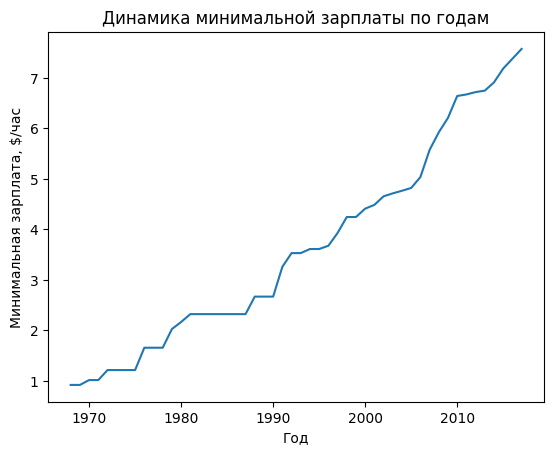

In [29]:
plt.plot(series)
plt.title("Динамика минимальной зарплаты по годам")
plt.xlabel("Год")
plt.ylabel("Минимальная зарплата, $/час")

In [33]:
series.index.min()

1968

In [35]:
series.index.max()

2017

In [38]:
x_range = list(range(series.index.min(), series.index.max() + 1, 10))
x_range.append(series.index.max())

[1968, 1978, 1988, 1998, 2008, 2017]

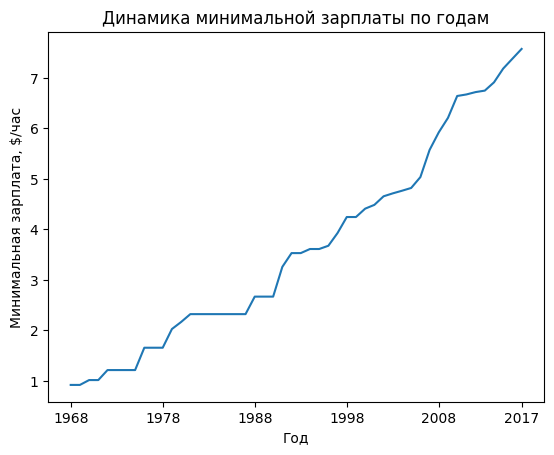

In [46]:
plt.plot(series)
plt.title("Динамика минимальной зарплаты по годам")
plt.xlabel("Год")
plt.ylabel("Минимальная зарплата, $/час")
plt.xticks(x_range)
plt.show()

In [47]:
series_1 = df[df["Year"] == 2010]["Salary"]
series_1.max()

8.55

In [48]:
series_1.min()

0.0

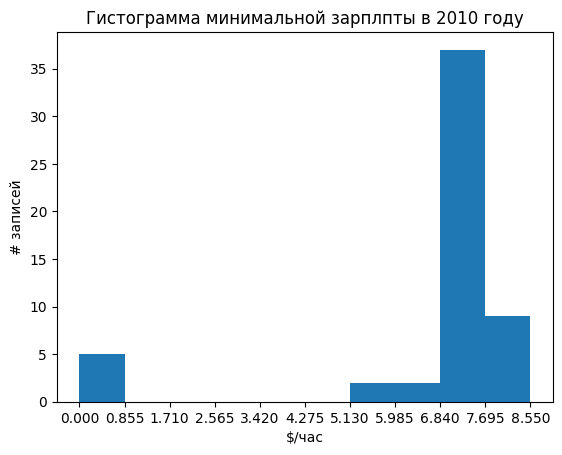

In [51]:
bin_width = series_1.max()/10
x_range = [i*bin_width for i in range(11)]
plt.hist(series_1, bins=10)
plt.title("Гистограмма минимальной зарплпты в 2010 году")
plt.xlabel("$/час")
plt.ylabel("# записей")
plt.xticks(x_range)
plt.show()

Text(0, 0.5, '$/час')

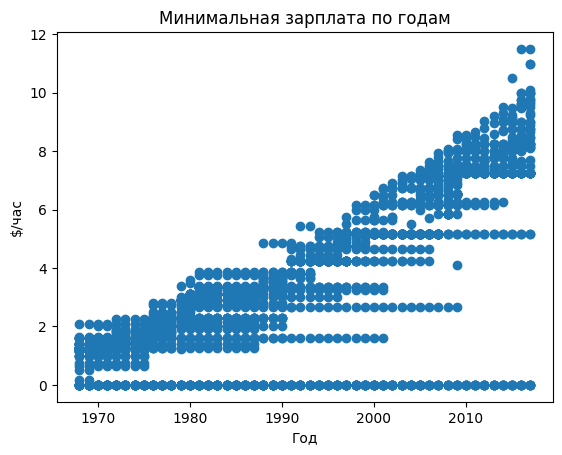

In [52]:
plt.scatter(df["Year"], df["Salary"])
plt.title("Минимальная зарплата по годам")
plt.xlabel("Год")
plt.ylabel("$/час")

In [53]:
df = pd.read_csv("wage-data-coast.csv")
df

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1
...,...,...,...,...
2745,2017,Virginia,7.25000,1
2746,2017,Washington,11.00000,1
2747,2017,West Virginia,8.75000,0
2748,2017,Wisconsin,7.25000,0


Text(0, 0.5, '$/час')

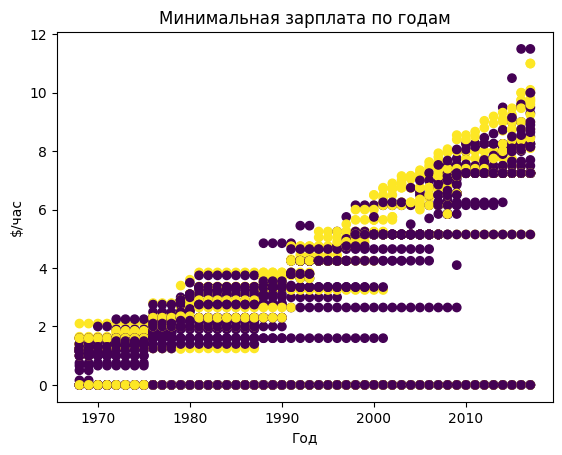

In [54]:
plt.scatter(df["Year"], df["Salary"], c=df["IsCoastal"])
plt.title("Минимальная зарплата по годам")
plt.xlabel("Год")
plt.ylabel("$/час")

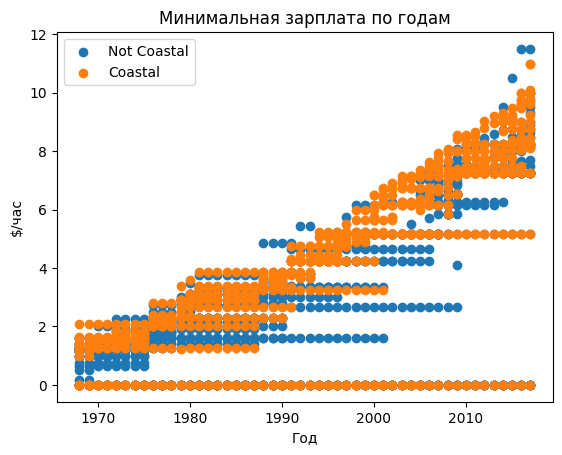

In [55]:
df0 = df[df["IsCoastal"]==0]
plt.scatter(df0["Year"], df0["Salary"], label="Not Coastal")

df1 = df[df["IsCoastal"]==1]
plt.scatter(df1["Year"], df1["Salary"], label="Coastal")

plt.title("Минимальная зарплата по годам")
plt.xlabel("Год")
plt.ylabel("$/час")

plt.legend()

In [61]:
series_2000 = df[(df["IsCoastal"]==1)&(df["Year"]==2000)]["Salary"]

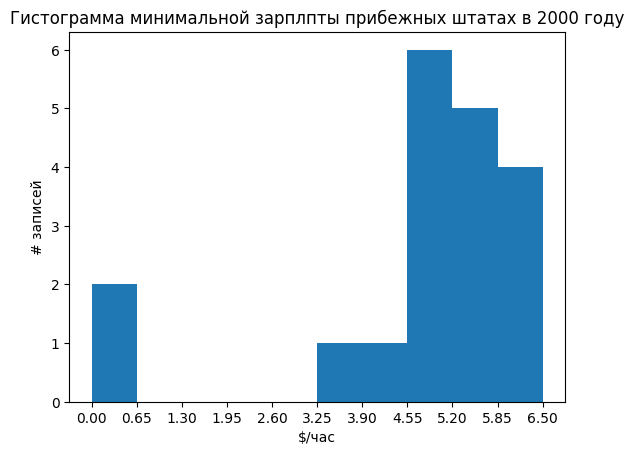

In [67]:
plt.hist(series_2000)

plt.title("Гистограмма минимальной зарплпты прибежных штатах в 2000 году")
plt.xlabel("$/час")
plt.ylabel("# записей")

bin_width = series_2000.max() / 10
x_range = [i*bin_width for i in range(11)]

plt.xticks(x_range)
plt.show()

In [73]:
df_1 = df[df["Year"] == 2015].groupby("IsCoastal")["Salary"].mean()
df_1 

IsCoastal
0    6.882778
1    7.760526
Name: Salary, dtype: float64

In [74]:
df_1 = df_1.sort_values(ascending = False).reset_index()
df_1 

,IsCoastal,Salary
0,1,7.760526
1,0,6.882778


In [80]:
df_1["IsCoastalStr"] = np.where(df_1["IsCoastal"] == 1, "Coastal", "Not Coastal")
df_1 

,IsCoastal,Salary,IsCoastalStr
0,1,7.760526,Coastal
1,0,6.882778,Not Coastal


Text(0, 0.5, '$/час')

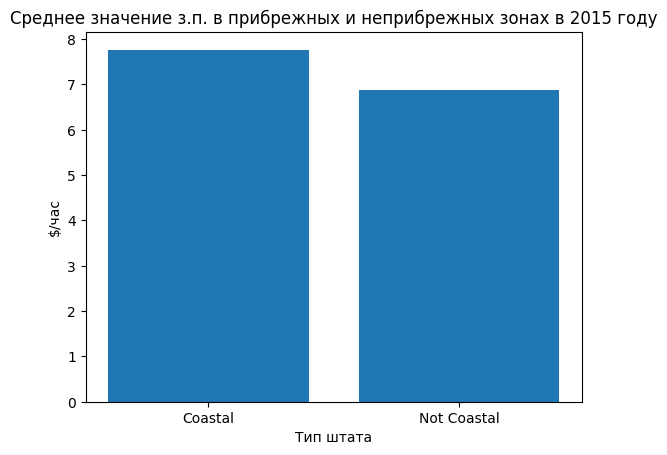

In [83]:
plt.bar(df_1["IsCoastalStr"], df_1["Salary"])
plt.title("Среднее значение з.п. в прибрежных и неприбрежных зонах в 2015 году")
plt.xlabel("Тип штата")
plt.ylabel("$/час")

In [84]:
df["IsCoastalStr"] = np.where(df["IsCoastal"] == 1, "Coastal", "Not Coastal")

In [86]:
series = df[["State", "IsCoastalStr"]].drop_duplicates().groupby("IsCoastalStr")["State"].count()
series

IsCoastalStr
Coastal        19
Not Coastal    36
Name: State, dtype: int64

Text(0.5, 1.0, 'Соотношение прибрежных и неприбрежных штатов')

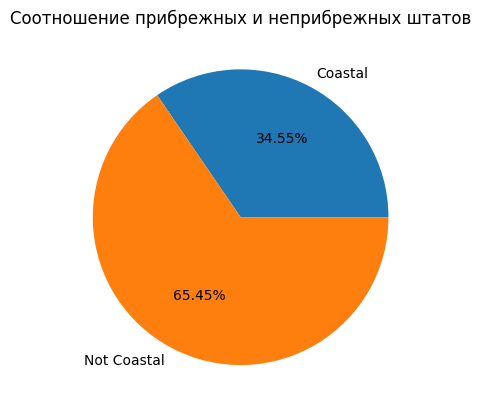

In [89]:
plt.pie(series, labels=series.index, autopct='%1.2f%%')
plt.title("Соотношение прибрежных и неприбрежных штатов")